# 排序算法

## 插入排序

从第二个数开始遍历，将指针处的数字向前比较，若小于则往前插，若大于则停止。

In [22]:
def insertion(a):
    for i in range(1, len(a)):
        for j in range(i, 0, -1):
            if(a[j-1] > a[j]):
                temp = a[j-1]
                a[j-1] = a[j]
                a[j] = temp
            else:
                break
    return a

a = [3,4,5,6,2,4,1,0,9,8,7]
a = insertion(a)
print(a)

[0, 1, 2, 3, 4, 4, 5, 6, 7, 8, 9]


## 希尔排序

设定一个间隔gap，例如gap=4，则对0，0+4；1，1+4n；2,2+4n；3,3+4n等4个数组分别进行插入排序，完成后，减小gap再进行一次上述操作，直到最后gap=1时进行最后一次插入排序

In [10]:
def shell(a):
    # Knuth序列
    h = 1
    while(h <= int(len(a)/3)):  # 在此使用了Knuth序列h=3h+1
        h = h * 3 + 1
    gap = h
    while gap >= 1:
        for i in range(gap, len(a)):
            for j in range(i, gap-1, -gap):
                if(a[j-gap] > a[j]):
                    temp = a[j-gap]
                    a[j-gap] = a[j]
                    a[j] = temp
        gap = int((gap-1)/3)
    return a

a = [9,5,6,7,2,6,7,5,67,45,7,1,5,4,6,7,5,4,5,78,7,6,34,2,9,1,10]
a = shell(a)
print(a)

[1, 1, 2, 2, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7, 7, 9, 9, 10, 34, 45, 67, 78]


## 归并排序

JAVA和Python内部的排序算法。将一个数组分成两个子数组，运用递归的方法不断拆分并排序子数组。

假如两个子数组都是按顺序排列，则按照两个子数组的下标将两个子数组的元素进行比较，较小的元素则直接复制到一个空数组中。

In [27]:
def mergesort(a):
    if len(a) <= 1:
        return a
    mid = int(len(a) / 2)
    left = mergesort(a[:mid])
    right = mergesort(a[mid:])
    return merge(left, right)

def merge(left, right):
    result = []
    i = 0
    j = 0
    while (i <= len(left) - 1 and j <= len(right) - 1):
        if (left[i] <= right[j]):
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1
    result += left[i:]
    result += right[j:]
    return result
        
if __name__=="__main__":
    seq = [0,434,654,78568,342,765]
    print ('排序前：',seq)
    result = mergesort(seq)
    print ('排序后：',result)

排序前： [0, 434, 654, 78568, 342, 765]
排序后： [0, 342, 434, 654, 765, 78568]


## 快速排序

### 单轴快排

选定数组第一位作为轴（pivot），从数组的两端分别开始遍历，若左端找到比轴小的数，同时右端找到比轴大的数，两个数进行交换。最终左右两端的指针会相等，这时判断两个指针指向的元素是否大于轴，若小于，则与轴交换，若大于，则指针的前一位与轴交换。

In [48]:
class Quick:
    def quick(self, lists):
        return self.quick_sort(lists, 0, len(lists)-1)
    
    def swap(self, arr, a, b):
        temp = arr[a]
        arr[a] = arr[b]
        arr[b] = temp
        return arr
    
    def quick_sort(self, lists, leftbound, rightbound):
        if (leftbound >= rightbound):
            return lists
        pivot = lists[leftbound]
        left = leftbound
        right = rightbound
        while (left < right):
            while (left < right and lists[left] <= pivot):
                left += 1
            while (left < right and lists[right] > pivot):
                right -= 1
            lists = self.swap(lists, left, right)
        if (lists[left] < pivot):
            lists = self.swap(lists, left, leftbound)
        else:
            lists = self.swap(lists, left - 1, leftbound)
        lists = self.quick_sort(lists, leftbound, right - 1)
        lists = self.quick_sort(lists, right, rightbound)
    
        return lists     
    
if __name__=="__main__":
    lists=[1,2,3,4,5,6,7,8,9,0]
    print("排序前：", lists)
    print("排序后：", Quick().quick(lists))

排序前： [1, 2, 3, 4, 5, 6, 7, 8, 9, 0]
排序后： [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


## 计数排序

适用于数组数据量大但数据范围小的情况。数据取值的个数需要有限。通过统计每一个数出现的频数，将频数数组累加为一个累加数组，最后通过累加数组的数字最后一位位置倒序遍历原数组确定排序好的新数组。

In [26]:
def countingsort(a):
    n = len(a)
    if(n <= 1):
        return a
    max_a = max(a)
    min_a = min(a)
    count = [0 for i in range(min_a, max_a + 1)]
    for num in a:
        count[num - min_a] += 1
    for i in range(1, len(count)):
        count[i] += count[i - 1]
    result = [0 for i in range(n)]
    for i in range(n - 1, -1, -1):
        result[count[a[i] - min_a] - 1] = a[i]
        count[a[i] - min_a] -= 1
    return result

if __name__ == '__main__':
    a = [1,2,3,4,3,2,3,4,3,5,6,7,8,9,2,3,4,5,1,2,3,5,6,8,5,4,3,2,6,8,4,1]
    print('排序前：', a)
    print('排序后：', countingsort(a))

排序前： [1, 2, 3, 4, 3, 2, 3, 4, 3, 5, 6, 7, 8, 9, 2, 3, 4, 5, 1, 2, 3, 5, 6, 8, 5, 4, 3, 2, 6, 8, 4, 1]
排序后： [1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 7, 8, 8, 8, 9]


## 基数排序

按照计数排序的步骤，先排个位，再排十位……最终即可得到排好顺序的数组

In [34]:
def getbit(num, bit):
    return (num % (10 ** bit)) // (10 ** (bit - 1))

def radixsort(a):
    if(len(a) <= 1):
        return a
    max_a = max(a)
    bit = 0
    while(max_a // (10 ** bit) != 0):
        bit += 1
    for i in range(1, bit + 1):
        count = [0 for j in range(10)]
        result = [0 for j in range(len(a))]
        for num in a:
            count[getbit(num, i)] += 1
        for c_num in range(1, len(count)):
            count[c_num] += count[c_num - 1]
        for index in range(len(a)-1, -1, -1):
            result[count[getbit(a[index], i)] - 1] = a[index]
            count[getbit(a[index], i)] -= 1
        a = result
    return a

if __name__ == '__main__':
    a = [23123, 3423, 435636, 23, 4356, 43563463, 234435, 2345, 4396]
    print('排序前：', a)
    print('排序后：', radixsort(a))

排序前： [23123, 3423, 435636, 23, 4356, 43563463, 234435, 2345, 4396]
排序后： [23, 2345, 3423, 4356, 4396, 23123, 234435, 435636, 43563463]


## 堆排序

堆是一种特殊的完全二叉树

在此取大根堆，即每个节点都比自己的孩子大

1、建堆；2、堆顶为最大元素，将其移出堆；3、把最后一个元素放到堆顶；4、向下调整*；5、重复上述步骤至堆中无元素

利用堆排序解决topk问题可以获得最小的时间复杂度

In [21]:
# 堆排序
def sift(a, low, high):
    """
    Parameters
    ----------
    a : List, 输入的待调整列表
    low : Int, 根节点
    high : Int, 最后一个节点
    """
    i = low
    j = 2 * i + 1
    tmp = a[i]
    while(j <= high):
        if (j + 1 <= high and a[j] > a[j + 1]):
            j = j + 1
        if (tmp > a[j]):
            a[i] = a[j]
            i = j
            j = 2 * i + 1
        else:
            a[i] = tmp
            break
    else:
        a[i] = tmp
    return a

def heap(a):
    n = len(a)
    # 建堆
    for i in range((n - 2)//2, -1, -1):
        a = sift(a, i, n-1)
    # 向下调整过程（排序）
    for i in range((n - 1), -1, -1):
        a[0], a[i] = a[i], a[0]
        a = sift(a, 0, i - 1)
    return a[::-1]

# 解决topk问题，得到数组中最大的k个值
def topk(a, k):
    heap = a[:k]
    # 建立堆
    for i in range((k - 2) // 2, -1, -1):
        heap = sift(heap, i, k - 1)
    # 遍历剩下的
    for i in range(k, len(a)):
        if(a[i] > heap[0]):
            heap[0] = a[i]
            sift(heap, 0, k - 1)
    # 向下调整排序
    for i in range((k - 1), -1, -1):
        heap[0], heap[i] = heap[i], heap[0]
        heap = sift(heap, 0, i - 1)
    return heap
        

a = [4,3,9,8,7,6,0,9,1,4,3,2,5,7,8,4,9,2,7,6,4,5,7,5,5,8,9,10]
print(heap(a))
print(topk(a, 10))

[0, 1, 2, 2, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 7, 7, 7, 7, 8, 8, 8, 9, 9, 9, 9, 10]
[10, 9, 9, 9, 9, 8, 8, 8, 7, 7]


# 查找算法

In [45]:
# 顺序查找，时间复杂度为O(n)
def find(a, n):
    for i in range(len(a)):
        if(a[i] == n):
            return i
    else:
        return None

a = [1,2,3,4,5,6,7,8,9,0]
print(find(a, 10))

0


In [47]:
# 二分查找，时间复杂度为O(log2n),但只能查找有序的数组中元素
def find(a, n):
    left = 0
    right = len(a) - 1
    while (left <= right):
        mid = (left + right)//2
        if (a[mid] == n):
            return mid
        elif (a[mid] > n):
            right = mid - 1
        elif (a[mid] < n):
            left = mid + 1
    else:
        return None

a = [1,2,3,4,5,6,7,8,9,10]
print(find(a, 0))    

None


# 数据结构

## 栈

只有入栈，出栈，查询栈顶三个功能，只用一个列表就可以表示。

In [14]:
class Stack:
    def __init__(self):
        self.stack = []
    def push(self, element):
        self.stack.append(element)
    def pop(self):
        if(self.stack == []):
            return None
        else:
            self.stack.pop()
    def gettop(self):
        if(self.stack == []):
            return None
        else:
            return self.stack[-1]

stack = Stack()
stack.push(1)
stack.push(2)
stack.push(3)
stack.push(4)
stack.push(5)
stack.push(6)
stack.pop()
print(stack.gettop())
print(stack.stack)

5
[1, 2, 3, 4, 5]


## 栈应用：括号匹配问题

给一个字符串，包含小括号中括号大括号，需要判断该字符串是否括号匹配

思路：左括号进栈，如果遇到右括号，若右括号与栈顶的左括号匹配，则将栈顶的左括号出栈，否则不匹配。若字符串遍历完，栈不为空栈，也不匹配。

In [15]:
def bracket_match(a):
    match = {')':'(', ']':'[', '}':'{'}
    if(len(a) == 0):
        return None
    stack = Stack()
    for i in a:
        if(i in ['(', '[', '{']):
            stack.push(i)
        elif(i in [')', ']', '}'] and match[i] == stack.gettop()):
            stack.pop()
        elif(i in [')', ']', '}'] and match[i] != stack.gettop()):
            return False
    if(stack.stack == []):
        return True
    else:
        return False

a = "[p]{p}ppp({}[[]])"
print(bracket_match(a))

True


## 队列

队列需要指定长度，有出队，入队等功能

当有入队元素时，队尾向后挪一位，元素存在队尾出。当有出队时，队首向后挪一位。队首处始终没有元素。

满队判断条件：(rear + 1) % length == front

空队判断条件：rear == front

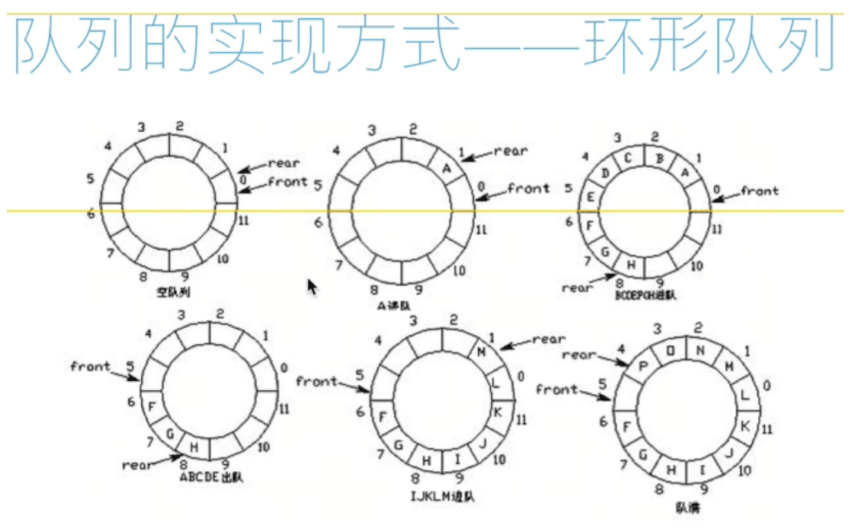

In [98]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('queue.png')
plt.figure(figsize=(15,10))
plt.imshow(img)
plt.axis('off')
plt.show()

In [74]:
class Queue:
    def __init__(self, length = 100):
        self.queue = [None for i in range(length)]
        self.front = 0
        self.rear = 0
        self.length = length
    def isfull(self):
        if((self.rear + 1) % self.length == self.front):
            return True
        else:
            return False
    def isempty(self):
        if(self.rear == self.front):
            return True
        else:
            return False
    def push(self, element):
        if(self.isfull() == False):
            self.rear = (self.rear + 1) % self.length
            self.queue[self.rear] = element
        else:
            print('Queue is full')
    def pop(self):
        if(self.isempty() == False):
            self.front = (self.front + 1) % self.length
            element = self.queue[self.front]
            self.queue[self.front] = None
            return element #出队时需要输出出队的元素
        else:
            print('Queue is empty')

Q = Queue(10)
for i in range(10):
    Q.push(i)
print(Q.queue)
for i in range(5):
    print(Q.pop())
print(Q.queue)
for i in range(3):
    Q.push(i + 10)
print(Q.queue)
            

Queue is full
[None, 0, 1, 2, 3, 4, 5, 6, 7, 8]
0
1
2
3
4
[None, None, None, None, None, None, 5, 6, 7, 8]
[10, 11, 12, None, None, None, 5, 6, 7, 8]


In [79]:
# 使用Python内置模块实现队列
from collections import deque

# deque支持双向列表，即队首队尾都可以进行入队和出队
#输入队列初始元素和最大队列长度，如队列已满且还要入队，则队首元素会自动出队
q = deque([1,2,3], 5)
q.append(4) #正常入队
q.popleft() #正常出队
q.appendleft(5) #反向入队
q.pop() #反向出队
print(q)
for i in range(5):
    q.append(i)
print(q)
print(q[1])

deque([5, 2, 3], maxlen=5)
deque([0, 1, 2, 3, 4], maxlen=5)
1


### 栈和队列分别解决迷宫问题

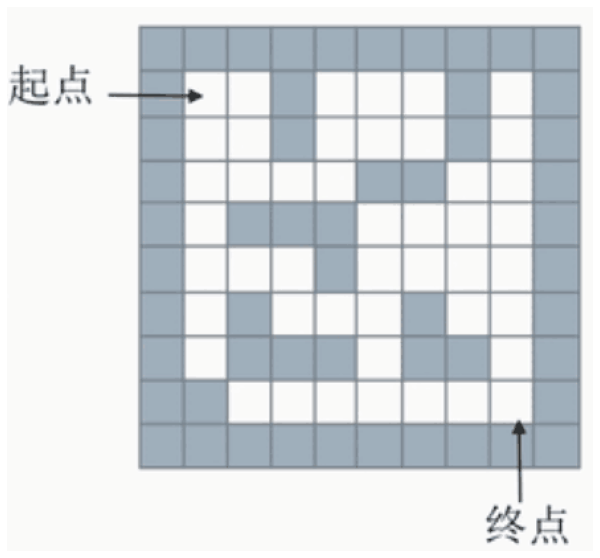

In [104]:
# 迷宫
maze = [
    [1,1,1,1,1,1,1,1,1,1],
    [1,0,0,1,0,0,0,1,0,1],
    [1,0,0,1,0,0,0,1,0,1],
    [1,0,0,0,0,1,1,0,0,1],
    [1,0,1,1,1,0,0,0,0,1],
    [1,0,0,0,1,0,0,0,0,1],
    [1,0,1,0,0,0,1,0,0,1],
    [1,0,1,1,1,0,1,1,0,1],
    [1,1,0,0,0,0,0,0,0,1],
    [1,1,1,1,1,1,1,1,1,1]
]
img = Image.open('maze.png')
plt.figure(figsize=(15,10))
plt.imshow(img)
plt.axis('off')
plt.show()

In [105]:
# 栈，不能找到最优路线
def maze_stack(maze, x1, y1, x2, y2):
    S = Stack()
    S.push((x1, y1))
    maze[x1][y1] = 2
    directions = [
        lambda x, y : (x - 1, y),   # 上
        lambda x, y : (x, y + 1),   # 右
        lambda x, y : (x + 1, y),   # 下
        lambda x, y : (x, y - 1)   # 左
        ]
    while(S.stack != []):
        if(S.gettop() == (x2, y2)):
            print(S.stack)
            return True
        # print(S.stack)
        # for i in range(len(maze)):
        #     print(maze[i])
        for direction in directions:
            if (maze[direction(S.gettop()[0], S.gettop()[1])[0]] [direction(S.gettop()[0], S.gettop()[1])[1]] == 0):
                S.push(direction(S.gettop()[0], S.gettop()[1]))
                maze[S.gettop()[0]][S.gettop()[1]] = 2
                break
        else:
            maze[S.gettop()[0]][S.gettop()[1]] = 2
            S.pop()
        
    else:
        print('没有路')
        return False

print(maze_stack(maze, 1, 1, 8, 8))

[(1, 1), (1, 2), (2, 2), (3, 2), (3, 1), (4, 1), (5, 1), (5, 2), (5, 3), (6, 3), (6, 4), (6, 5), (5, 5), (4, 5), (4, 6), (4, 7), (3, 7), (3, 8), (4, 8), (5, 8), (6, 8), (7, 8), (8, 8)]
True


In [107]:
# 初始化迷宫
maze = [
    [1,1,1,1,1,1,1,1,1,1],
    [1,0,0,1,0,0,0,1,0,1],
    [1,0,0,1,0,0,0,1,0,1],
    [1,0,0,0,0,1,1,0,0,1],
    [1,0,1,1,1,0,0,0,0,1],
    [1,0,0,0,1,0,0,0,0,1],
    [1,0,1,0,0,0,1,0,0,1],
    [1,0,1,1,1,0,1,1,0,1],
    [1,1,0,0,0,0,0,0,0,1],
    [1,1,1,1,1,1,1,1,1,1]
]

# 队列，可以找到最短路线
def real_path(path):
    node = path[-1]
    realpath = []
    
    while(node[-1] != -1):
        realpath.append(node[:2])
        node = path[node[-1]]
    
    realpath.append(node[:2])
    realpath.reverse()
    return realpath
    

def maze_queue(maze, x1, y1, x2, y2):
    Q = deque()
    Q.append((x1, y1, -1))
    maze[x1][y1] = 2
    path = []
    directions = [
        lambda x, y : (x - 1, y),   # 上
        lambda x, y : (x, y + 1),   # 右
        lambda x, y : (x + 1, y),   # 下
        lambda x, y : (x, y - 1)   # 左
        ]
    while(len(Q) != 0):
        coo = Q.popleft()
        path.append(coo)
        if(coo[0] == x2 and coo[1] == y2):
            print(real_path(path))
            return True
        for direction in directions:
            nextnode = direction(coo[0], coo[1])
            if(maze[nextnode[0]][nextnode[1]] == 0):
                Q.append((nextnode[0], nextnode[1], len(path) - 1))
                maze[nextnode[0]][nextnode[1]] = 2
    else:
        return False

print(maze_queue(maze, 1, 1, 8, 8)) 

[(1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (5, 2), (5, 3), (6, 3), (6, 4), (6, 5), (7, 5), (8, 5), (8, 6), (8, 7), (8, 8)]
True


## 链表

每一个节点包括两部分：数据和指向下一个节点的指针

In [1]:
# 链表的Python构建方法
class ListNode(object):
    def __init__(self, item = None):
        self.item = item
        self.next = None

In [5]:
# 链表的插入（创建）操作(头插法)，可以实现输入元素的倒序输出
def create_ln(a):
    head = ListNode(a[0])
    for element in a[1:]:
        node = ListNode(element)
        node.next = head
        head = node
    return head

a = [1,2,3,4,5,6]
ln = create_ln(a)
while(ln):
    print(ln.item)
    ln = ln.next

6
5
4
3
2
1


In [3]:
# 链表的插入（创建）操作(尾插法)，可以实现输入元素的顺序输出
def create_ln(a):
    head = ListNode(a[0])
    tail = head
    for element in a[1:]:
        node = ListNode(element)
        tail.next = node
        tail = node
    return head

a = [1,2,3,4,5,6]
ln = create_ln(a)
while(ln):
    print(ln.item)
    ln = ln.next

1
2
3
4
5
6


### 完整功能版链表

In [1]:
class LinkList:
    class Node:
        def __init__(self, item = None):
            self.item = item
            self.next = None
    
    # 迭代器
    class LinkListIterator:
        def __init__(self, node):
            self.node = node
        def __next__(self):
            if self.node:
                cur_node = self.node
                self.node = cur_node.next
                return cur_node.item
            else:
                raise StopIteration
        def __iter__(self):
            return self
    
    def __init__(self, iterable = None):
        self.head = None
        self.tail = None
        if iterable:
            self.extend(iterable)
    
    def append(self, obj):
        s = LinkList.Node(obj)
        if not self.head:
            self.head = s
            self.tail = s
        else:
            self.tail.next = s
            self.tail = s
    
    def extend(self, iterable):
        for obj in iterable:
            self.append(obj)
    
    def find(self, obj):
        for n in self:
            if n == obj:
                return True
        else:
            return False
    
    def __iter__(self):
        return self.LinkListIterator(self.head)
    
    def __repr__(self):
        return ('<'+','.join(map(str, self))+'>')

class HashTable:
    def __init__(self, size = 101):
        self.size = size
        self.T = [LinkList() for i in range(self.size)]
    
    def h(self, k):
        return k % self.size
    
    def insert(self, k):
        i = self.h(k)
        if self.find(k):
            print('重复输入！')
        else:
            self.T[i].append(k)
    
    def find(self, k):
        i = self.h(k)
        return self.T[i].find(k)
    
a = [1,2,3,4,5,6,7]
L = LinkList(a)
print(L)
for i in L:
    print(i)
print(L)

hash_map = HashTable(10)
hash_map.insert(0)
hash_map.insert(4)
hash_map.insert(1)
hash_map.insert(11)
hash_map.find(4)
print(hash_map.T)

<1,2,3,4,5,6,7>
1
2
3
4
5
6
7
<1,2,3,4,5,6,7>
[<0>, <1,11>, <>, <>, <4>, <>, <>, <>, <>, <>]


## 树

### 模拟文件系统

In [9]:
# 节点
class Node:
    def __init__(self, name, type = 'dir'):
        self.name = name
        self.type = type
        self.children = []
        self.parent = None
    
    def __repr__(self):
        return self.name

# 模拟文件系统
class FileSystemTree:
    def __init__(self):
        self.root = Node('/')
        self.now = self.root
    
    # 创建新的文件夹
    def mkdir(self, name):
        # name是以‘/’结尾的
        if(name[-1] != '/'):
            name += '/'
        node = Node(name)
        self.now.children.append(node)
        node.parent = self.now
    
    # 显示该目录下的所有文件夹
    def ls(self):
        return self.now.children
    
    # 切换目录
    def cd(self, name):
        if(name[-1] != '/'):
            name += '/'
        if(name == '../'):
            self.now = self.now.parent
            return
        for child in self.now.children:
            if child.name == name:
                self.now = child
                return
        raise ValueError('invalid dir')
        
        
tree = FileSystemTree()
tree.mkdir('var')
tree.mkdir('bin')
tree.mkdir('usr/')
print(tree.ls())
tree.cd('bin')
tree.mkdir('python')
print(tree.ls())
tree.cd('..')
print(tree.now)

[var/, bin/, usr/]
[python/]
/


### 二叉树

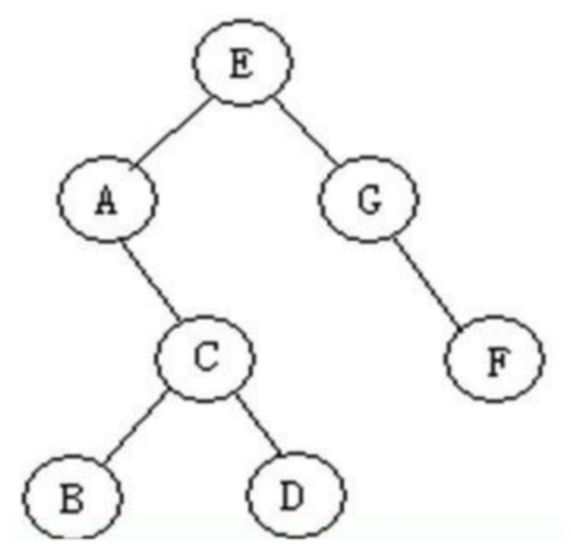

In [7]:
# 二叉树的定义
class BiTreeNode:
    def __init__(self, data):
        self.data = data
        self.lchild = None
        self.rchild = None
        
a = BiTreeNode('A')
b = BiTreeNode('B')
c = BiTreeNode('C')
d = BiTreeNode('D')
e = BiTreeNode('E')
f = BiTreeNode('F')
g = BiTreeNode('G')

e.lchild = a
e.rchild = g
a.rchild = c
c.lchild = b
c.rchild = d
g.rchild = f

from PIL import Image
import matplotlib.pyplot as plt
img = Image.open('bitree.png')
plt.figure(figsize=(15,10))
plt.imshow(img)
plt.axis('off')
plt.show()

### 二叉树的遍历

#### 前序遍历

从根节点开始，先访问左子树，若子树还有左子树，则继续访问，若无，则访问该子树的右子树。

In [9]:
# 取上段代码的根节点
root = e

def pre_order(root):
    if root:
        print(root.data, end = ' ')
        pre_order(root.lchild)
        pre_order(root.rchild)

pre_order(root)

E A C B D G F 

#### 中序遍历

从最左边的节点遍历到最右边

In [11]:
def mid_order(root):
    if root:
        mid_order(root.lchild)
        print(root.data, end = ' ')
        mid_order(root.rchild)

mid_order(root)

A B C D E G F 

#### 后序遍历

从下往上遍历，先左后右

In [12]:
def post_order(root):
    if root:
        post_order(root.lchild)
        post_order(root.rchild)
        print(root.data, end = ' ')

post_order(root)

B D C A F G E 

#### 层次遍历

从高往低，先左后右，用队列实现

队列一般用来解决前后节点有联系的输出问题，前节点用后即输出，每次只保持新的节点在队列中

In [13]:
from collections import deque

def level_order(root):
    queue = deque()
    queue.append(root)
    while len(queue) > 0:
        node = queue.popleft()
        print(node.data, end = ' ')
        if(node.lchild):
            queue.append(node.lchild)
        if(node.rchild):
            queue.append(node.rchild)
            
level_order(root)

E A G C F B D 

### 二叉搜索树

右子树的节点一定大于上层和左节点（中序遍历一定是排好的顺序）

In [18]:
class BiTreeNode:   # 首先建立一个树的节点类
    def __init__(self, data):
        self.data = data
        self.lchild = None
        self.rchild = None
        self.parent = None
    
class BST:      # 二叉搜索树
    def __init__(self, vals):
        self.root = None
        if vals:
            for val in vals:
                self.root = self.insert(self.root, val)

    def insert(self, node, val):    # 插入的递归写法
        if not node:
            node = BiTreeNode(val)
        elif val < node.data:
            node.lchild = self.insert(node.lchild, val)
            node.lchild.parent = node
        elif val > node.data:
            node.rchild = self.insert(node.rchild, val)
            node.rchild.parent = node
        return node

    def query(self, node, val):     # 查询的递归写法
        if not node:
            return None
        if (val > node.data):
            return self.query(node.rchild, val)
        elif (val < node.data):
            return self.query(node.lchild, val)
        else:
            return node
    
    def __remove_node_1(self, node):    #当要删除的节点没有孩子时
        if not node.parent:     #判断其是不是根节点
            self.root = None
        if node == node.parent.lchild:
            node.parent.lchild = None
        else:
            node.parent.rchild = None
            
    def __remove_node_21(self, node):   #当要删除的节点有一个左孩子时
        if not node.parent:
            self.root = node.lchild
            node.lchild.parent = None
        if node == node.parent.lchild:
            node.parent.lchild = node.lchild
        else:
            node.parent.rchild = node.lchild
        
    def __remove_node_22(self, node):   #当要删除的节点有一个右孩子时
        if not node.parent:
            self.root = node.rchild
            node.rchild.parent = None
        if node == node.parent.lchild:
            node.parent.lchild = node.rchild
        else:
            node.parent.rchild = node.rchild 
          
    def delete(self, val):     #删除节点
        if tree.root:       #判断不是空树
            node = tree.root
            node = self.query(node, val)
            if not node:
                return False
            if not node.lchild and not node.rchild:
                self.__remove_node_1(node)
            elif not node.rchild and node.lchild:
                self.__remove_node_21(node)
            elif not node.lchild and node.rchild:
                self.__remove_node_22(node)
            else:
                min_node = node.rchild
                while min_node.lchild:
                    min_node = min_node.lchild
                node.data = min_node.data
                if not node.data.rchild:
                    self.__remove_node_1(min_node)
                else:
                    self.__remove_node_22(min_node)
    
    def pre_order(self, root):
        if root:
            print(root.data, end = ' ')
            self.pre_order(root.lchild)
            self.pre_order(root.rchild)

    def mid_order(self, root):
        if root:
            self.mid_order(root.lchild)
            print(root.data, end = ' ')
            self.mid_order(root.rchild)

    def post_order(self, root):
        if root:
            self.post_order(root.lchild)
            self.post_order(root.rchild)
            print(root.data, end = ' ')

tree = BST([4,6,7,9,2,1,3,5,8])
print('前序：')
tree.pre_order(tree.root)
print('\n中序：')
tree.mid_order(tree.root)
print('\n后序：')
tree.post_order(tree.root)
s = tree.query(tree.root, 9)
print('\n', s.data)
tree.insert(tree.root, 10)
tree.delete(3)
tree.delete(5)
tree.delete(7)
print('\n中序：')
tree.mid_order(tree.root)

前序：
4 2 1 3 6 5 7 9 8 
中序：
1 2 3 4 5 6 7 8 9 
后序：
1 3 2 5 8 9 7 6 4 
 9

中序：
1 2 4 6 8 9 10 

### AVL树（自平衡二叉搜索树）

特点：根的左右子树的高度差不能超过1；根的左右子树都是平衡二叉树

节点不只存储数据和指针，还会存储平衡因子（节点左子树与右子树的重量差）

插入时，需要旋转子树以保持平衡。

插入到左子树的左子树时，右旋；

插入到右子树的右子树时，左旋；

插入到右子树的左子树时，先右旋再左旋；

插入到左子树的右子树时，先左旋再右旋。

In [ ]:
from Bitree import BiTreeNode, BST

class avl_node(BiTreeNode):
    def __init__(self, data):
        BiTreeNode.__init__(self, data)
        self.b_f = None
        
class AVL(BST):
    def __init__(self, val):
        

## 贪心算法

需要找到贪什么是正确的

找零问题：如何找零才能使钞票数最少

分数背包问题：小偷背书包偷金砂，如何使偷到的价值最高

拼接最大数字问题：如何将数字字符串拼接起来可以使最后得到的数字最大

In [1]:
# 找零问题
def change(a, n):
    a.sort(reverse = True)
    num = [(0, 0) for _ in range(len(a))]
    for i in range(len(a)):
        num[i] = (a[i], n // a[i])
        n -= num[i][1] * a[i]
    return num

# 分数背包问题
def bagging(a, n):
    a.sort(key = lambda x: x[0] / x[1], reverse = True)
    result = []
    for i in range(len(a)):
        if n > a[i][1]:
            result.append(a[i])
            n -= a[i][1]
        else:
            result.append((a[i][0], n))
            break
    return result

# 字符串拼接最大数字问题
def splicing(a):
    if(len(a) == 0):
        return None
    elif(len(a) == 1):
        return int(a[0])
    for i in range(1, len(a)):
        for j in range(i, 0, -1):
            if(a[j] + a[j - 1] > a[j - 1] + a[j]):
                a[j], a[j - 1] = a[j - 1], a[j]
            else:
                break
    num = ''
    for i in range(len(a)):
        num += a[i]
    return int(num)

# 找零
a = [1,5,10,20,50,100]
print(change(a, 376))

# 分数背包(价值，重量)
a = [(60, 10), (120, 30), (100, 20)]
print(bagging(a, 50))

# 字符串拼接最大数字
a = ['23', '34', '9', '18', '159', '232', '15', '96']
print(splicing(a))

[(100, 3), (50, 1), (20, 1), (10, 0), (5, 1), (1, 1)]
[(60, 10), (100, 20), (120, 20)]
99634232321815915


## 动态规划

解决最优化问题，需要寻找一个最优的递推式

钢条切割问题：不同长度的钢条价格不同，如何切割可以得到最大的价值

最长公共子序列：寻找两个序列的最长公共子序列，子序列与子串不同，可以不相连

In [3]:
# 钢条切割问题
def collect_s(s, n):
    S = []
    while n != 0:
        if (s[n] == 0):
            S.append(n)
            break
        S.append(s[n])
        n -= s[n]
    return S

def steel_cutting(p, n):
    r = [0]
    s = [0]
    for i in range(n):
        res_r = p[i]
        res_s = 0
        for j in range(i):
            if(res_r < p[j] + r[i - j]):
                res_r = p[j] + r[i - j]
                res_s = j + 1
        r.append(res_r)
        s.append(res_s)
    S = collect_s(s, n)
    return r, S

# 最长公共子序列问题
def LCS(x, y):
    m = len(x)
    n = len(y)
    c = [[0 for i in range(n + 1)] for i in range(m + 1)]
    d = [[0 for i in range(n + 1)] for i in range(m + 1)] # 存方向，上1左2左上3
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if (x[i - 1] == y[j - 1]):
                c[i][j] = c[i - 1][j - 1] + 1
                d[i][j] = 3
            else:
                if (c[i][j - 1] > c[i - 1][j]):
                    c[i][j] = c[i][j - 1]
                    d[i][j] = 2
                else:
                    c[i][j] = c[i - 1][j]
                    d[i][j] = 1
    sub_LCS = []
    md = m
    nd = n
    while(d[md][nd] != 0):
        if (d[md][nd] == 1):
            md -= 1
        elif (d[md][nd] == 2):
            nd -= 1
        else:
            sub_LCS.append(x[md - 1])
            md -= 1
            nd -= 1
    sub_LCS.reverse()
    return c[m][n], sub_LCS
                

# 钢条切割
p = [1,5,8,9,10,17,17,20,21,23,24,26,27,27,28,30,33,36,39,40]
print(steel_cutting(p, 11))

# 公共子序列
x = 'ABCBDAB'
y = 'BDCABA'
print(LCS(x, y))

([0, 1, 5, 8, 10, 13, 17, 18, 22, 25, 27, 30], [2, 3, 6])
(4, ['B', 'C', 'B', 'A'])


# LeetCode

1 两数之和  哈希

给定一个整数数组 nums 和一个整数目标值 target，请你在该数组中找出 和为目标值 target  的那 两个 整数，并返回它们的数组下标。

你可以假设每种输入只会对应一个答案。但是，数组中同一个元素在答案里不能重复出现。

你可以按任意顺序返回答案。

示例 1：

输入：nums = [2,7,11,15], target = 9
输出：[0,1]
解释：因为 nums[0] + nums[1] == 9 ，返回 [0, 1]。

示例 2：

输入：nums = [3,2,4], target = 6
输出：[1,2]

示例 3：

输入：nums = [3,3], target = 6
输出：[0,1]

In [5]:
# 使用哈希值（python中字典），时间复杂度为O(n)，因为字典的查询不用经过循环
class Solution3(object):
    def twoSum(self, nums, target):
        L = None
        haxidic = {}
        for ind, num in enumerate(nums):
            haxidic[num] = ind
        for i in range(len(nums)):
            if (target - nums[i] in haxidic and haxidic[target - nums[i]] != i):
                L = [i, haxidic[target - nums[i]]]
                break
        return L

# 验证结果
S = Solution3()
index = S.twoSum([3,3,4], 6)
print(index)

[0, 1]


2 两数相加 链表

给你两个 非空 的链表，表示两个非负的整数。它们每位数字都是按照 逆序 的方式存储的，并且每个节点只能存储 一位 数字。

请你将两个数相加，并以相同形式返回一个表示和的链表。

你可以假设除了数字 0 之外，这两个数都不会以 0 开头。

输入：l1 = [2,4,3], l2 = [5,6,4]
输出：[7,0,8]
解释：342 + 465 = 807.

注意输入输出均为链表

In [8]:
# 在原题中链表已经被定义好，但在此需要自己重新定义
class ListNode(object):
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

class Solution:
    def addTwoNumbers(self, l1, l2):
        count = 0
        ret = None
        tmp = None
        while l1 or l2 or count:
            num = 0
            if l1:
                num += l1.val
                l1 = l1.next
            if l2:
                num += l2.val
                l2 = l2.next
            if count:
                num += count
                count -= 1
            count, num = divmod(num, 10)
            tmp = ListNode(num, tmp)
        while(tmp != None):
            ret = ListNode(tmp.val, ret)
            tmp = tmp.next
        return ret      # 在原题中应返回ret.next

# 验证结果
l1 = None
for num in [2,4,3]:
    l1 = ListNode(num, l1)
l2 = None
for num in [5,6,4]:
    l2 = ListNode(num, l2)

s = Solution()
r = s.addTwoNumbers(l1, l2)
tmp = r
while (tmp != None):
    print(tmp.val)
    tmp = tmp.next

7
0
8


3 无重复的最长子串 哈希

给定一个字符串 s ，请你找出其中不含有重复字符的 最长子串 的长度。

示例 1:

输入: s = "abcabcbb"
输出: 3 
解释: 因为无重复字符的最长子串是 "abc"，所以其长度为 3。

示例 2:

输入: s = "bbbbb"
输出: 1
解释: 因为无重复字符的最长子串是 "b"，所以其长度为 1。

示例 3:

输入: s = "pwwkew"
输出: 3
解释: 因为无重复字符的最长子串是 "wke"，所以其长度为 3。
     请注意，你的答案必须是 子串 的长度，"pwke" 是一个子序列，不是子串。
     
示例 4:

输入: s = ""
输出: 0

In [4]:
class Solution(object):
    def lengthOfLongestSubstring(self, s):
        """
        :type s: str
        :rtype: int
        """
        if not s:
            return 0
        
        left = -1
        max_s = 0
        s_dict = {}
        for i in range(len(s)):
            if(s[i] in s_dict and s_dict[s[i]] > left):
                left = s_dict[s[i]]
                s_dict[s[i]] = i
            else:
                s_dict[s[i]] = i
            if(max_s < i - left):
                max_s = i - left
        return max_s

l = Solution()
length = l.lengthOfLongestSubstring('abba')
print(length)

2


4 寻找两个正序数组的中位数

给定两个大小分别为 m 和 n 的正序（从小到大）数组 nums1 和 nums2。请你找出并返回这两个正序数组的 中位数 。

示例 1：

输入：nums1 = [1,3], nums2 = [2]
输出：2.00000
解释：合并数组 = [1,2,3] ，中位数 2

示例 2：

输入：nums1 = [1,2], nums2 = [3,4]
输出：2.50000
解释：合并数组 = [1,2,3,4] ，中位数 (2 + 3) / 2 = 2.5

示例 3：

输入：nums1 = [0,0], nums2 = [0,0]
输出：0.00000

示例 4：

输入：nums1 = [], nums2 = [1]
输出：1.00000

示例 5：

输入：nums1 = [2], nums2 = []
输出：2.00000

In [6]:
class Solution:
    def findMedianSortedArrays(self, nums1, nums2) -> float:
        n1 = len(nums1)
        n2 = len(nums2)
        if n1 > n2:
            return self.findMedianSortedArrays(nums2,nums1)
        k = (n1 + n2 + 1)//2
        left = 0
        right = n1
        # 二分法
        while left < right :
            m1 = left + (right - left)//2
            m2 = k - m1
            if nums1[m1] < nums2[m2-1]:
                left = m1 + 1
            else:
                right = m1
        m1 = left
        m2 = k - m1 
        c1 = max(nums1[m1-1] if m1 > 0 else float("-inf"), nums2[m2-1] if m2 > 0 else float("-inf") )
        if (n1 + n2) % 2 == 1:
            return c1
        c2 = min(nums1[m1] if m1 < n1 else float("inf"), nums2[m2] if m2 <n2 else float("inf"))
        return (c1 + c2) / 2

f = Solution()
nums1 = [1,2]
nums2 = [3,4]
mid = f.findMedianSortedArrays(nums1, nums2)
print(mid) 

2.5


5 最长回文字串 DP

给你一个字符串 s，找到 s 中最长的回文子串。

示例 1：

输入：s = "babad"
输出："bab"
解释："aba" 同样是符合题意的答案。

示例 2：

输入：s = "cbbd"
输出："bb"

示例 3：

输入：s = "a"
输出："a"

示例 4：

输入：s = "ac"
输出："a"

In [7]:
class Solution:
    def longestPalindrome(self, s: str) -> str:
        p = ''
        for i in range(len(s)):
            len1 = len(self.findp(s, i, i))
            if(len1 > len(p)):
                p = self.findp(s, i, i)
            len2 = len(self.findp(s, i, i + 1))
            if(len2 > len(p)):
                p = self.findp(s, i, i + 1)
        return p
    

    def findp(self, s, l, r):
        while(l >= 0 and r < len(s) and s[l] == s[r]):
            l -= 1
            r += 1
        return s[l+1:r]
    
S = Solution()
s = 'babab'
Pa = S.longestPalindrome(s)
print(Pa)

babab


6 Z字形变换 找规律

将一个给定字符串 s 根据给定的行数 numRows ，以从上往下、从左到右进行 Z 字形排列。

比如输入字符串为 "PAYPALISHIRING" 行数为 3 时，排列如下：

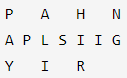

之后，你的输出需要从左往右逐行读取，产生出一个新的字符串，比如："PAHNAPLSIIGYIR"。

请你实现这个将字符串进行指定行数变换的函数：

string convert(string s, int numRows);
 

示例 1：
输入：s = "PAYPALISHIRING", numRows = 3
输出："PAHNAPLSIIGYIR"

示例 2：
输入：s = "PAYPALISHIRING", numRows = 4
输出："PINALSIGYAHRPI"

解释：

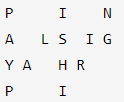

示例 3：

输入：s = "A", numRows = 1
输出："A"

In [8]:
class Solution:
    def convert(self, s: str, numRows: int) -> str:
        zs = ['' for i in range(numRows)]
        vary = 1
        row = 0
        for i in s:
            zs[row] += i
            if(row == 0):
                vary = 1
            elif(row == numRows - 1):
                vary = -1
            if(row == 0 and row == numRows - 1):
                vary = 0
            row += vary
        return ''.join(zs)

s = 'PAYPALISHIRING'
numRows = 3
S = Solution()
result = S.convert(s, numRows)
print(result)

PAHNAPLSIIGYIR


7 整数反转

给你一个 32 位的有符号整数 x ，返回将 x 中的数字部分反转后的结果。

如果反转后整数超过 32 位的有符号整数的范围 [−2^31,  2^31 − 1] ，就返回 0。

假设环境不允许存储 64 位整数（有符号或无符号）。
 

示例 1：

输入：x = 123
输出：321

示例 2：

输入：x = -123
输出：-321

示例 3：

输入：x = 120
输出：21

示例 4：

输入：x = 0
输出：0

In [10]:
class Solution:
    def reverse(self, x):
        str_x = str(x)
        if str_x[0] != "-":
            str_x = str_x[::-1]
            x = int(str_x)
        else:
            str_x = str_x[:0:-1]
            x = int(str_x)
            x = -x
        return x if -2 ** (31) < x < 2 ** (31) - 1 else 0

x = -123
S = Solution()
result = S.reverse(x)
print(result)

-321


8 字符串转换整数 正则

请你来实现一个 myAtoi(string s) 函数，使其能将字符串转换成一个 32 位有符号整数（类似 C/C++ 中的 atoi 函数）。

函数 myAtoi(string s) 的算法如下：

读入字符串并丢弃无用的前导空格
检查下一个字符（假设还未到字符末尾）为正还是负号，读取该字符（如果有）。 确定最终结果是负数还是正数。 如果两者都不存在，则假定结果为正。
读入下一个字符，直到到达下一个非数字字符或到达输入的结尾。字符串的其余部分将被忽略。
将前面步骤读入的这些数字转换为整数（即，"123" -> 123， "0032" -> 32）。如果没有读入数字，则整数为 0 。必要时更改符号（从步骤 2 开始）。
如果整数数超过 32 位有符号整数范围 [−2^31,  2^31 − 1] ，需要截断这个整数，使其保持在这个范围内。具体来说，小于 −2^31 的整数应该被固定为 −2^31 ，大于 2^31 − 1 的整数应该被固定为 2^31 − 1 。
返回整数作为最终结果。

注意：

本题中的空白字符只包括空格字符 ' ' 。

除前导空格或数字后的其余字符串外，请勿忽略 任何其他字符。

示例 1：

输入：s = "42"

输出：42

解释：加粗的字符串为已经读入的字符，插入符号是当前读取的字符。

第 1 步："42"（当前没有读入字符，因为没有前导空格）
         
第 2 步："42"（当前没有读入字符，因为这里不存在 '-' 或者 '+'）
         
第 3 步："42"（读入 "42"）
           
解析得到整数 42 。
由于 "42" 在范围 [-231, 231 - 1] 内，最终结果为 42 。

示例 2：

输入：s = "   -42"
输出：-42

解释：

第 1 步："   -42"（读入前导空格，但忽视掉）
            
第 2 步："   -42"（读入 '-' 字符，所以结果应该是负数）
             
第 3 步："   -42"（读入 "42"）
               
解析得到整数 -42 。
由于 "-42" 在范围 [-231, 231 - 1] 内，最终结果为 -42 。

示例 3：

输入：s = "4193 with words"
输出：4193

解释：

第 1 步："4193 with words"（当前没有读入字符，因为没有前导空格）
         
第 2 步："4193 with words"（当前没有读入字符，因为这里不存在 '-' 或者 '+'）
         
第 3 步："4193 with words"（读入 "4193"；由于下一个字符不是一个数字，所以读入停止）
             
解析得到整数 4193 。
由于 "4193" 在范围 [-231, 231 - 1] 内，最终结果为 4193 。

示例 4：

输入：s = "words and 987"
输出：0

解释：

第 1 步："words and 987"（当前没有读入字符，因为没有前导空格）
         
第 2 步："words and 987"（当前没有读入字符，因为这里不存在 '-' 或者 '+'）
         
第 3 步："words and 987"（由于当前字符 'w' 不是一个数字，所以读入停止）
         
解析得到整数 0 ，因为没有读入任何数字。
由于 0 在范围 [-231, 231 - 1] 内，最终结果为 0 。

示例 5：

输入：s = "-91283472332"
输出：-2147483648

解释：

第 1 步："-91283472332"（当前没有读入字符，因为没有前导空格）
         
第 2 步："-91283472332"（读入 '-' 字符，所以结果应该是负数）
          
第 3 步："-91283472332"（读入 "91283472332"）
                     
解析得到整数 -91283472332 。
由于 -91283472332 小于范围 [-231, 231 - 1] 的下界，最终结果被截断为 -231 = -2147483648 。

In [11]:
class Solution:
    def myAtoi(self, s: str) -> int:
        s = s.strip()
        if(s == '' or s == '-' or s == '+'):
            return 0
        import re
        m = re.match('[^\d]+', s.lstrip('-').lstrip('+'))
        if m != None:
            return 0
        else:
            m = re.search('\-*\+*\d+', s).group()
            if(m[0:2] == '-+' or m[0:2] == '--' or m[0:2] == '++'):
                return 0
            result = int(m)
            if(result < -2**31):
                return -2**31
            elif(result > 2**31-1):
                return 2**31 - 1
            else:
                return result

s = '+1'
S = Solution()
print(S.myAtoi(s))

1


9 回文数

给你一个整数 x ，如果 x 是一个回文整数，返回 true ；否则，返回 false 。

回文数是指正序（从左向右）和倒序（从右向左）读都是一样的整数。例如，121 是回文，而 123 不是。

 

示例 1：

输入：x = 121
输出：true

示例 2：

输入：x = -121
输出：false
解释：从左向右读, 为 -121 。 从右向左读, 为 121- 。因此它不是一个回文数。

示例 3：

输入：x = 10
输出：false
解释：从右向左读, 为 01 。因此它不是一个回文数。

示例 4：

输入：x = -101
输出：false

In [3]:
class Solution:
    def isPalindrome(self, x: int) -> bool:
        if(x<0):
            return False
        num = 0
        a = x 
        while(a != 0):
            tmp = a % 10
            num = num * 10 + tmp
            a = a // 10
        if(num == x):
            return True
        else:
            return False

S = Solution()
print(S.isPalindrome(101))

True


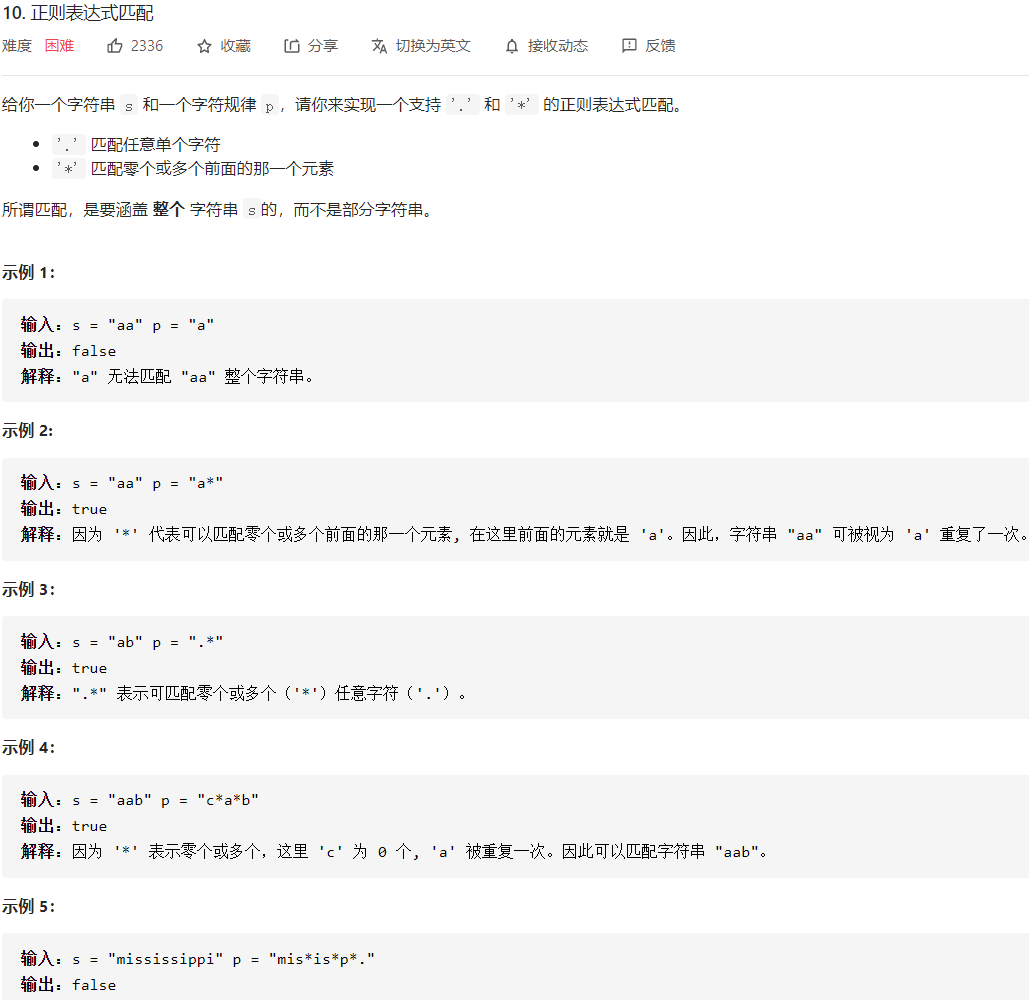

根本做不出来

In [7]:
class Solution:
    def isMatch(self, s: str, p: str) -> bool:
        DP = [[False for _ in range(len(s) + 1)] for _ in range(len(p) + 1)]
        DP[0][0] = True
        for i in range(len(p)):
            if(p[i] == '*'):
                DP[i+1][0] = DP[i-1][0]
        for i in range(1, len(p) + 1):
            for j in range(1, len(s) + 1):
                if(p[i-1] == s[j-1] or p[i-1] == '.'):
                    DP[i][j] = DP[i-1][j-1]
                elif(p[i-1] == '*'):
                    if(((p[i-2] == s[j-1] or p[i-2] == '.') and DP[i][j-1] == True) or DP[i-2][j] == True):
                        DP[i][j] = True
        return DP[-1][-1]

S = Solution()
s = "a"
p = "ab*a"
print(S.isMatch(s, p))

False


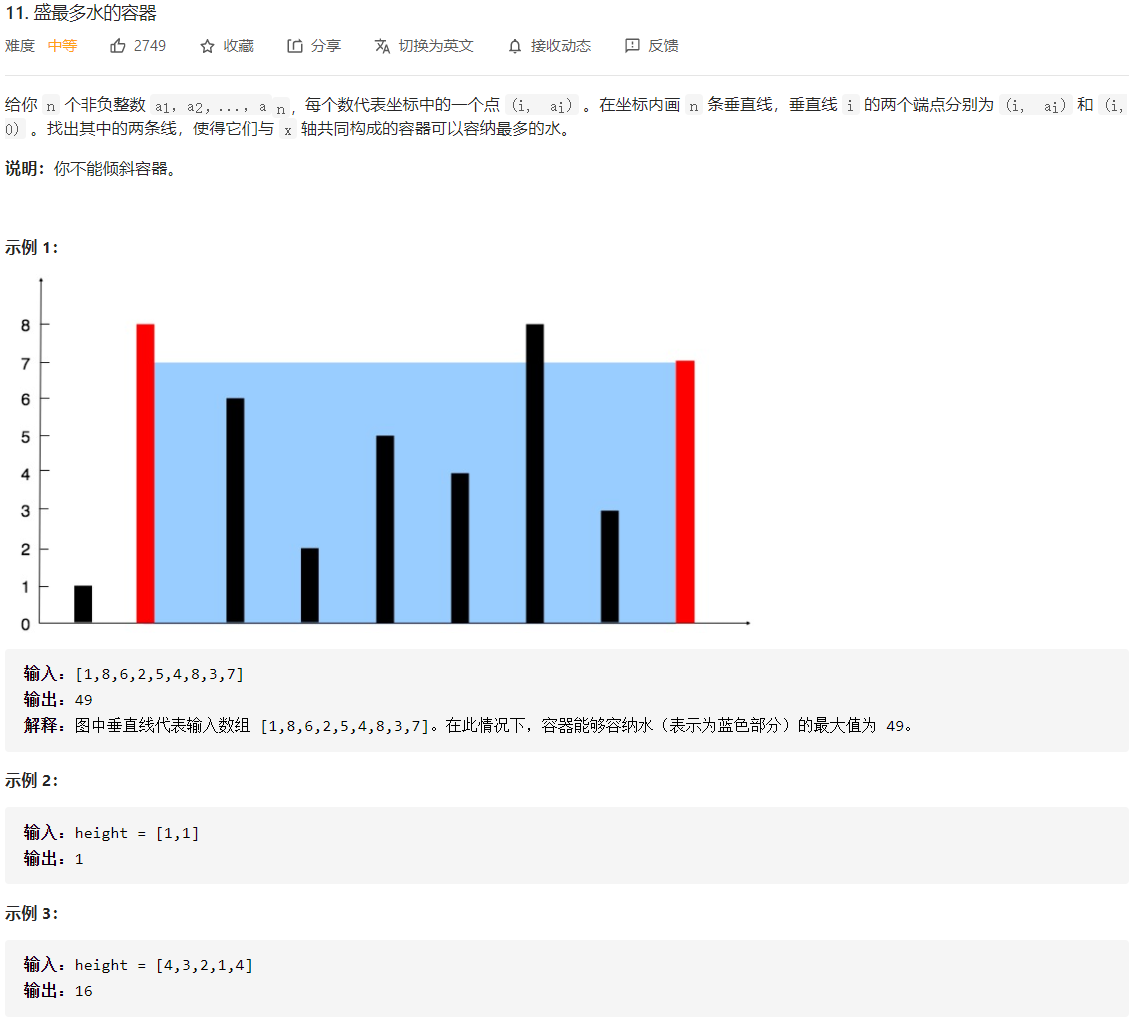

In [9]:
class Solution:
    def maxArea(self, height) -> int:
        left = 0
        right = len(height) - 1
        max_area = 0
        while(left < right):
            area = (right - left) * min(height[left], height[right])
            if(area > max_area):
                max_area = area
            if(height[left] < height[right]):
                left += 1
            else:
                right -= 1
        return max_area
    
S = Solution()
height = [1,8,6,2,5,4,8,3,7]
print(S.maxArea(height))

49


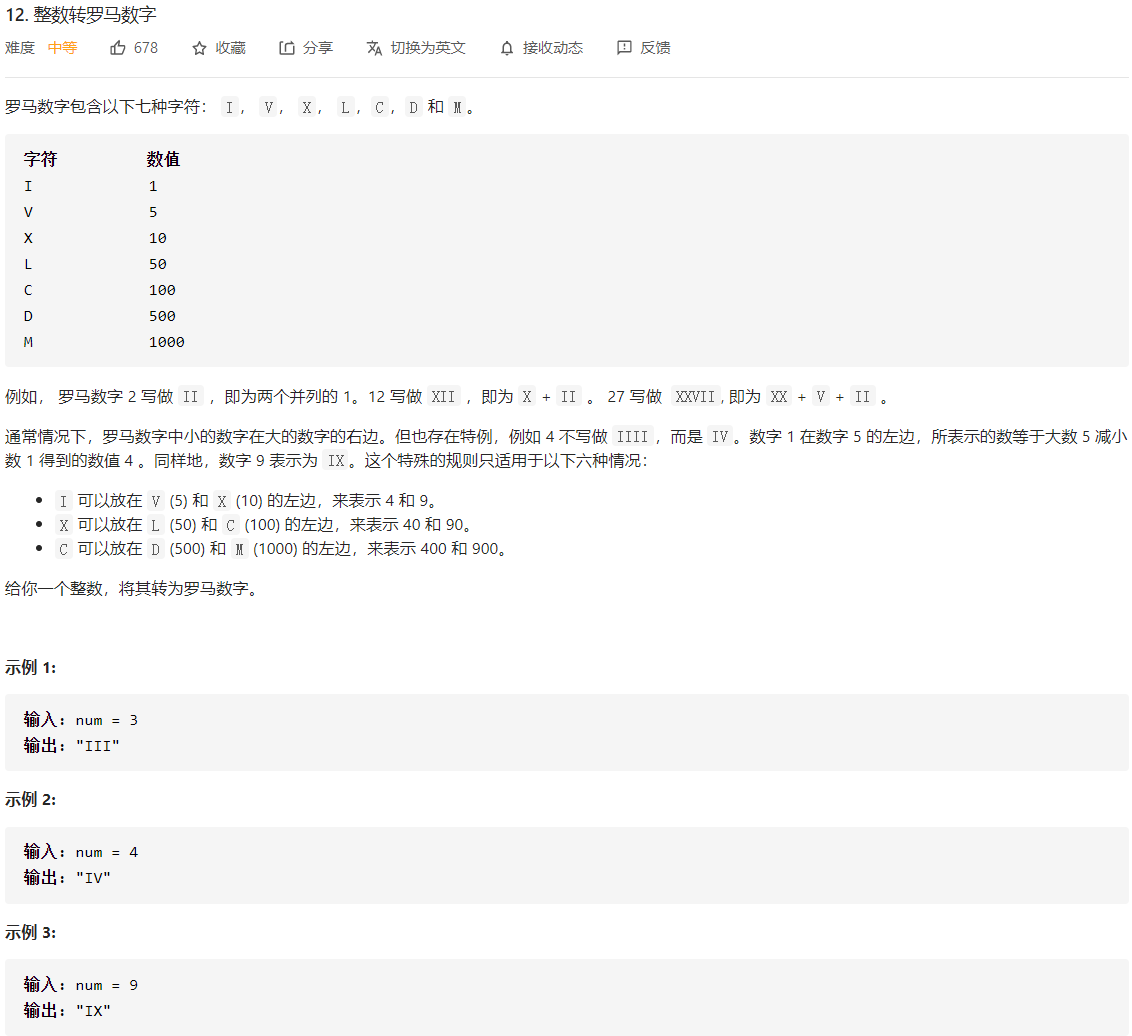

num<=3999

In [10]:
class Solution:
    def intToRoman(self, num: int) -> str:
        nums = [1000, 900, 500, 400, 100, 90, 50, 40, 10, 9, 5, 4, 1]
        romans = ['M', 'CM', 'D', 'CD', 'C', 'XC', 'L', 'XL', 'X', 'IX', 'V', 'IV', 'I']
        i = 0
        result = ''
        while(num > 0):
            if(num >= nums[i]):
                num -= nums[i]
                result += romans[i]
            else:
                i += 1
        return result
    
S = Solution()
num = 2008
print(S.intToRoman(num))

MMVIII


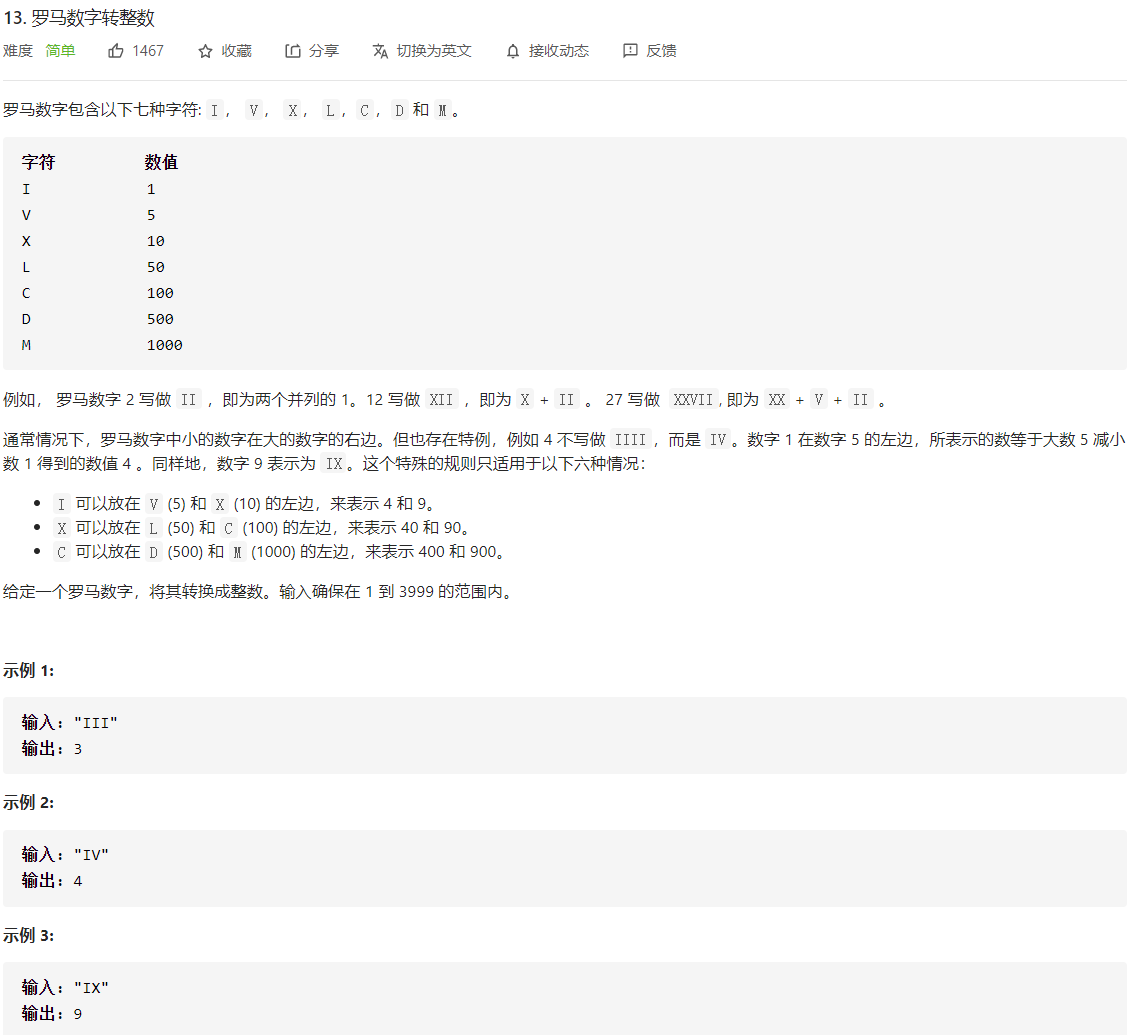

In [11]:
class Solution:
    def romanToInt(self, s: str) -> int:
        nums = [1000, 900, 500, 400, 100, 90, 50, 40, 10, 9, 5, 4, 1]
        romans = ['M', 'CM', 'D', 'CD', 'C', 'XC', 'L', 'XL', 'X', 'IX', 'V', 'IV', 'I']
        i = 0
        result = 0
        while(s):
            if(s[:len(romans[i])] == romans[i]):
                result += nums[i]
                s = s[len(romans[i]):]
            else:
                i += 1
        return result
    
S = Solution()
s = 'III'
print(S.romanToInt(s))

3


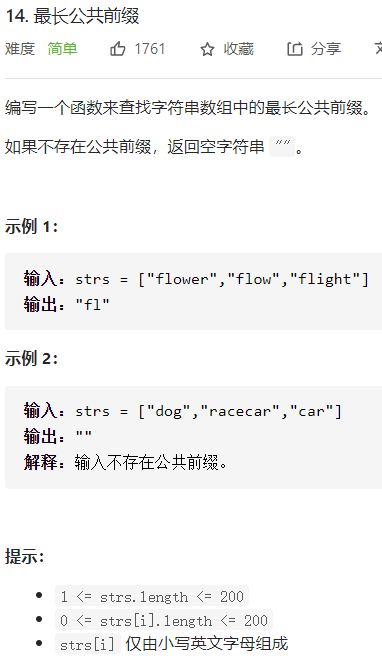

# 剑指offer

1
用两个栈实现一个队列。队列的声明如下，请实现它的两个函数 appendTail 和 deleteHead ，分别完成在队列尾部插入整数和在队列头部删除整数的功能。(若队列中没有元素，deleteHead 操作返回 -1 )

示例 1：

输入：

["CQueue","appendTail","deleteHead","deleteHead"]

[[],[3],[],[]]

输出：[null,null,3,-1]

示例 2：

输入：

["CQueue","deleteHead","appendTail","appendTail","deleteHead","deleteHead"]

[[],[],[5],[2],[],[]]

输出：[null,-1,null,null,5,2]

In [28]:
class CQueue:
    def __init__(self):
        self.A, self.B = [], []

    def appendTail(self, value: int) -> None:
        self.A.append(value)

    def deleteHead(self) -> int:
        if self.B: return self.B.pop()
        if not self.A: return -1
        while self.A:
            self.B.append(self.A.pop())
        return self.B.pop()